In [30]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

# REINFORCE

In [31]:
def get_test_losses(method, n_trials = 10): 
    trial_vec = [str(x) for x in range(1, n_trials + 1)]
    
    plt.plot()
    
    i = 0
    train_accuracy_vec = np.zeros(n_trials)
    test_accuracy_vec = np.zeros(n_trials)
    
    for trial in trial_vec:
        test_losses = np.load('./mnist_vae_results/ss_vae_' + method +'_trial' + trial + '_test_losses.npy')
        test_timing = np.load('./mnist_vae_results/ss_vae_' + method +'_trial' + trial + '_test_timing.npy')
        
        batch_timings = np.load('./mnist_vae_results/ss_vae_' + method +'_trial' +\
                                          trial + '_batch_timing.npy')
        if i == 0: 
            test_losses_array = np.zeros((n_trials, len(test_losses)))
            test_timing_array = np.zeros((n_trials, len(test_losses)))
            
            batch_timing_array = np.zeros((n_trials, len(batch_timings)))
        
        test_losses_array[i, :] = test_losses
        test_timing_array[i, :] = test_timing
        batch_timing_array[i, :] = batch_timings
        
        train_accuracy_vec[i] = np.load('./mnist_vae_results/ss_vae_' + method +'_trial' +\
                                          trial + '_train_accuracy.npy')[-1]
        test_accuracy_vec[i] = np.load('./mnist_vae_results/ss_vae_' + method +'_trial' +\
                                          trial + '_test_accuracy.npy')[-1]
        
        i += 1
        plt.plot(test_losses)
    
    print('train accuracy: mean = {}, sd = {}'.format(np.mean(train_accuracy_vec), np.std(train_accuracy_vec)))
    print('test accuracy: mean = {}, sd = {}'.format(np.mean(test_accuracy_vec), np.std(test_accuracy_vec)))
    print('avg sec per epoch: mean = {}, sd = {}'.format(np.mean(batch_timing_array), np.std(batch_timing_array)))
    
    return test_losses_array, test_timing_array, test_accuracy_vec, train_accuracy_vec

train accuracy: mean = 0.9365666747093201, sd = 0.004742368415296966
test accuracy: mean = 0.9399299681186676, sd = 0.004536531271138823
avg sec per epoch: mean = 15.730923329721582, sd = 1.593487115473329


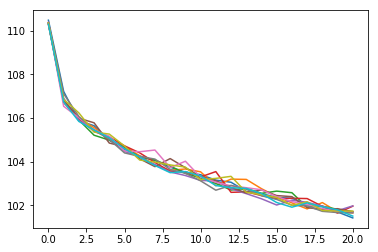

In [32]:
reinforce_test_losses_array, reinforce_test_timing_array, _, _ = \
    get_test_losses(method = 'reinforce')

# Fully marginalized

train accuracy: mean = 0.9685400128364563, sd = 0.0025983004941279686
test accuracy: mean = 0.966299968957901, sd = 0.00369026152217104
avg sec per epoch: mean = 31.394758922982923, sd = 3.170136159890003


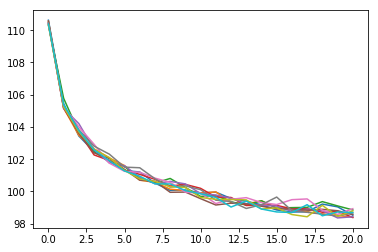

In [33]:
fully_marg_test_losses_array, fully_marg_test_timing_array, test_accuracy_vec, train_accuracy_vec = \
    get_test_losses(method = 'fully_marg')

# Topk

train accuracy: mean = 0.9670711159706116, sd = 0.001712638134445358
test accuracy: mean = 0.9650299787521363, sd = 0.003445888129508458
avg sec per epoch: mean = 17.450064977088775, sd = 1.7555304136617869


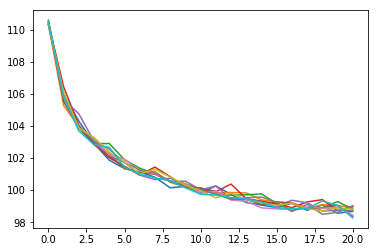

In [34]:
topk_test_losses_array, topk_test_timing_array, test_accuracy_vec, train_accuracy_vec = \
    get_test_losses(method = 'reinforce_topk1', n_trials = 10)

# NVIL

train accuracy: mean = 0.9571466684341431, sd = 0.00587683114947928
test accuracy: mean = 0.9562399685382843, sd = 0.005746851543727197
avg sec per epoch: mean = 17.479396397524543, sd = 1.8242871196843675


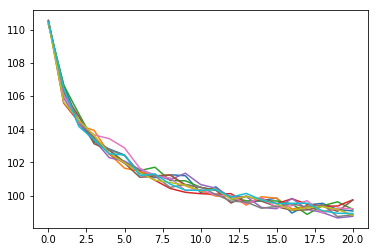

In [35]:
nvil_test_losses_array, nvil_test_timing_array, test_accuracy_vec, train_accuracy_vec = \
    get_test_losses(method = 'nvil', n_trials = 10)

# Gumbel Softmax

train accuracy: mean = 0.9555200159549713, sd = 0.003588858606398568
test accuracy: mean = 0.9545099675655365, sd = 0.00407490441647363
avg sec per epoch: mean = 16.389506184464633, sd = 1.7011779434619418


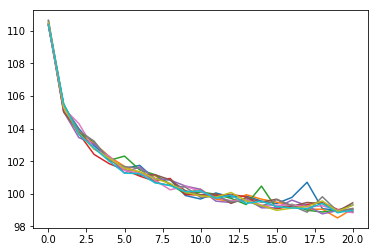

In [36]:
gumbel_test_losses_array, gumbel_test_timing_array, _, _ = \
    get_test_losses(method = 'gumbel', n_trials = 10)

# REBAR

train accuracy: mean = 0.9371066808700561, sd = 0.00828575907660153
test accuracy: mean = 0.93744997382164, sd = 0.008595611212758925
avg sec per epoch: mean = 19.102552245867134, sd = 1.9275717921788067


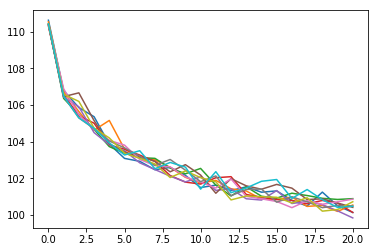

In [38]:
rebar_test_losses_array, rebar_test_timing_array, _, _ = \
    get_test_losses(method = 'rebar')

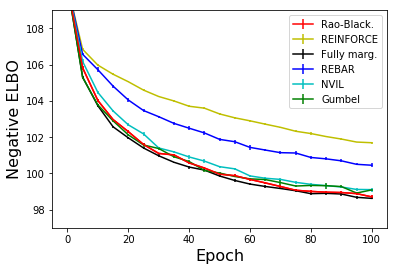

In [43]:

plt.errorbar(np.arange(21) * 5, 
            np.mean(topk_test_losses_array, axis = 0), 
            yerr= np.std(topk_test_losses_array, axis = 0) / np.sqrt(10), 
            label = 'Rao-Black.', 
            color = 'r')

plt.errorbar(np.arange(21) * 5, 
            np.mean(reinforce_test_losses_array, axis = 0), 
            yerr= np.std(reinforce_test_losses_array, axis = 0) / np.sqrt(10), 
            label = 'REINFORCE', 
            color = 'y')

plt.errorbar(np.arange(21) * 5, 
            np.mean(fully_marg_test_losses_array, axis = 0), 
            yerr= np.std(fully_marg_test_losses_array, axis = 0) / np.sqrt(10), 
            label = 'Fully marg.', 
            color = 'k')

plt.errorbar(np.arange(21) * 5, 
            np.mean(rebar_test_losses_array, axis = 0), 
            yerr= np.std(rebar_test_losses_array, axis = 0) / np.sqrt(10), 
            label = 'REBAR', 
            color = 'b')

plt.errorbar(np.arange(21) * 5, 
            np.mean(nvil_test_losses_array, axis = 0), 
            yerr= np.std(nvil_test_losses_array, axis = 0) / np.sqrt(10), 
            label = 'NVIL', 
            color = 'c')

plt.errorbar(np.arange(21) * 5, 
            np.mean(gumbel_test_losses_array, axis = 0), 
            yerr= np.std(gumbel_test_losses_array, axis = 0) / np.sqrt(10), 
            label = 'Gumbel', 
            color = 'g')

plt.errorbar(np.arange(21) * 5, 
            np.mean(topk_test_losses_array, axis = 0), 
            yerr= np.std(topk_test_losses_array, axis = 0) / np.sqrt(10), 
            color = 'r')

plt.legend()

plt.ylim((97, 109))

from matplotlib.ticker import StrMethodFormatter
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) #  decimal places


plt.xlabel('Epoch', fontsize = 16)
plt.ylabel('Negative ELBO', fontsize = 16)

plt.savefig('../icml_figures/ss_mnist_elbo_path.png')